# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
#Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Challenge 1 - Import and Describe the Dataset

#### In this challenge we will use the `austin_weather.csv` file. 

#### First import it into a data frame called `austin`.

In [61]:
# Your code here
austin = pd.read_csv('C:/Users/Data Analyst/Documents/GitHub/datamex0120/module-3/lab-intro-to-ml/austin_weather.csv')

#### Next, describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [41]:
austin.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


In [4]:
# Looking after rows with empty data per columns
x = austin['SeaLevelPressureHighInches'] == '-'
austin['SeaLevelPressureHighInches'][x]

596    -
597    -
598    -
Name: SeaLevelPressureHighInches, dtype: object

In [5]:
x = austin['VisibilityHighMiles'] == '-'
austin['VisibilityHighMiles'][x]
x = austin['DewPointLowF'] == '-'
austin['DewPointLowF'][x]
x = austin['VisibilityLowMiles'] == '-'
austin['VisibilityLowMiles'][x]

174    -
175    -
176    -
177    -
596    -
597    -
598    -
638    -
639    -
741    -
742    -
953    -
Name: VisibilityLowMiles, dtype: object

In [6]:
x = austin['WindHighMPH'] == '-'
austin['WindHighMPH'][x]

596    -
598    -
Name: WindHighMPH, dtype: object

In [84]:
# Cleaning rows with empty data 
austin = austin.drop([174, 175,176,177,596,597,598,638,639,741,742,953,980,983,981,982,984,985,986,987,988,989,1001,1069,1107])
austin.reset_index(inplace = True)

In [88]:
# Validating column type
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 22 columns):
index                         1294 non-null int64
Date                          1294 non-null datetime64[ns]
TempHighF                     1294 non-null int64
TempAvgF                      1294 non-null int64
TempLowF                      1294 non-null int64
DewPointHighF                 1294 non-null int8
DewPointAvgF                  1294 non-null int8
DewPointLowF                  1294 non-null int8
HumidityHighPercent           1294 non-null int8
HumidityAvgPercent            1294 non-null int8
HumidityLowPercent            1294 non-null int8
SeaLevelPressureHighInches    1294 non-null float64
SeaLevelPressureAvgInches     1294 non-null float64
SeaLevelPressureLowInches     1294 non-null float64
VisibilityHighMiles           1294 non-null int8
VisibilityAvgMiles            1294 non-null int8
VisibilityLowMiles            1294 non-null int8
WindHighMPH                   1294 no

In [89]:
# Updating every column type 
austin.Date = pd.to_datetime(austin.Date)
austin.Events = austin.Events.astype('category')
austin.PrecipitationSumInches = austin.PrecipitationSumInches.astype('category')
austin.SeaLevelPressureHighInches = austin.SeaLevelPressureHighInches.astype(float)
austin.SeaLevelPressureAvgInches = austin.SeaLevelPressureAvgInches.astype(float)
austin.SeaLevelPressureLowInches = austin.SeaLevelPressureLowInches.astype(float)
for e in austin.select_dtypes('object').columns:
    austin[e]=pd.to_numeric(austin[e], downcast='integer')


In [92]:
# Readjusting data frame index
austin.drop(['index'], axis = 1,inplace = True)
austin.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,80.703246,70.465224,59.724111,61.417311,56.520093,50.800618,87.785935,66.608192,44.921947,30.112890,30.023168,29.931747,9.991499,9.158423,6.841577,13.261206,5.023957,21.414992
std,14.733835,14.019761,14.195914,13.587864,14.861593,16.167495,11.080445,12.540926,17.067609,0.180476,0.172452,0.172525,0.164306,1.464328,3.686950,3.429064,2.081900,5.894283
min,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000
25%,72.000000,61.000000,49.000000,53.000000,46.000000,38.000000,84.000000,59.000000,32.000000,29.990000,29.910000,29.820000,10.000000,9.000000,3.000000,10.000000,3.000000,17.000000
50%,83.000000,73.000000,62.000000,66.000000,61.000000,56.000000,90.000000,67.000000,44.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000
75%,92.000000,82.000000,72.000000,73.000000,69.000000,65.000000,94.000000,74.000000,55.000000,30.210000,30.107500,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000


#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below 
Lot of rows with empty values, just generates noise to all data 

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [93]:
# Unique for dew points 
austin.DewPointAvgF.unique()

array([49, 36, 27, 28, 40, 39, 41, 26, 42, 22, 48, 32,  8, 11, 45, 55, 61,
       37, 47, 25, 23, 20, 33, 30, 29, 17, 14, 13, 54, 59, 15, 24, 34, 35,
       57, 50, 53, 60, 46, 56, 51, 31, 38, 62, 43, 63, 64, 67, 66, 58, 70,
       68, 65, 69, 71, 72, 73, 74, 21, 44, 52, 12, 75, 76, 18],
      dtype=int64)

# Your observation here
change every column type before using describe funtion 

The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [ ]:
wrong_type_columns = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                      'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 
                      'SeaLevelPressureAvgInches' ,'SeaLevelPressureLowInches', 'VisibilityHighMiles',
                      'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 
                      'WindGustMPH', 'PrecipitationSumInches']

#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

#### Calculate the ratio of missing rows to total rows

# Your code here
Around 21 columns had missing values 

As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [96]:
# Looking after null values 
austin.isna().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [95]:
# Your code here
austin.PrecipitationSumInches.isna().sum()

0

Over 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. It doesn't make sense to *guess* its missing values because the estimation will be too 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [97]:
# Values from Events column 
austin.Events.value_counts()

                             886
Rain                         187
Rain , Thunderstorm          135
Fog , Rain , Thunderstorm     33
Fog                           20
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: Events, dtype: int64

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [113]:
# Dummies to reestructure Events column 
austin['Rain'] = np.where(austin.Events.str.contains('Rain'), 1,0)
austin['Fog'] = np.where(austin.Events.str.contains('Fog'), 1,0)
austin['Thunderstorm'] = np.where(austin.Events.str.contains('Thunderstorm'), 1,0)
austin['Snow'] = np.where(austin.Events.str.contains('Snow'), 1,0)


In [118]:
austin.drop(columns = ['Rain_Thunderstorm', 'Rain_Thunderstorm_Fog', 'Rain_Fog'], inplace = True)

#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

#### Print out `austin_fixed` to check if the event columns are populated with the intended values

#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.

In [119]:
austin.drop(columns = ['Events'], inplace = True)

# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [135]:
# Creating new columns for for date (Days, Months, Years)
austin.drop(columns = ['Day', 'Month', 'Year'], inplace = True)

In [136]:
austin.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Rain,Fog,Thunderstorm,Snow
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,7,2,20,4,31,0.46,1,0,1,0
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,10,5,16,6,25,0,0,0,0,0
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,10,10,8,3,12,0,0,0,0,0
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,10,7,12,4,20,0,0,0,0,0
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,10,7,10,2,16,T,0,0,0,0


#### Print `austin_fixed` to check your `Date` column.

# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

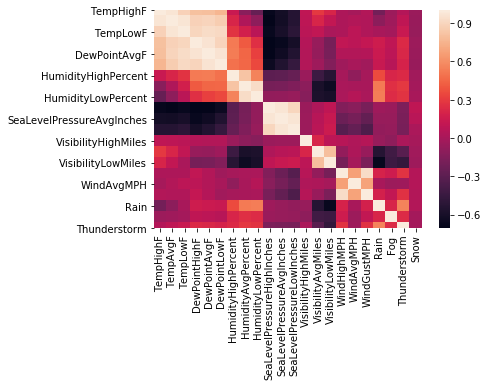

In [137]:
# Correlation map
import seaborn as sns
sns.heatmap(austin.corr());

In [139]:
#Stablishing X matrix and y vector
X=austin.drop(columns=['TempAvgF'])._get_numeric_data()
y=austin.TempAvgF

In the next cell, import `train_test_split` from `sklearn.model_selection`

In [140]:
#Library needed for ML
from sklearn.model_selection import train_test_split

Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [141]:
#Your code here:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

#### Congratulations! Now you have finished the preparation of the dataset!

# Bonus Challenge 1

#### While the above is the common practice to prepare most datasets, when it comes to time series data, we sometimes do not want to randomly select rows from our dataset.

This is because many time series algorithms rely on observations having equal time distances between them. In such cases, we typically select the majority of rows as the test data and the last few rows as the training data. We don't use `train_test_split()` to select the train/test data because it returns random selections.

In the following cell, compute the number of rows that account for 80% of our data and round it to the next integer. Assign this number to `ts_rows`.

In [ ]:
# Your code here:


Assign the first `ts_rows` rows of `X` to `X_ts_train` and the remaining rows to `X_ts_test`.

In [ ]:
# Your code here:


Assign the first `ts_rows` rows of `y` to `y_ts_train` and the remaining rows to `y_ts_test`.

In [ ]:
# Your code here:


# Bonus Challenge 2

As explained in the README, the main purpose of this lab is to show you the typical process of preparing data for machine learning which sometimes takes up 90% of your time. Data cleaning is a valuable skill to learn and you need to be proficient at various techniques including the ones we showed you above as well as others you'll learn in the future. In the real world this skill will help you perform your job successfully and efficiently.

Now that we're done with data praparation, if you want to expeirence what you'll do in the rest 10% of your time, let's make the final leap.

We will use scikit-learn's [*Support Vector Machines*](https://scikit-learn.org/stable/modules/svm.html) to compute the fit of our training data set, the test on our test data set.

#### In the cell below, import `svm` from `sklearn`:

In [ ]:
# Your code here


#### Now, call `svm.SVC.fit()` on `X_train` and `y_train`. Assign the returned value to a variable called `clf` which stands for *classifier*. Then obtain the test score for `X_test` and `y_test` by calling `clf.score()`.

In [ ]:
# Your code here


#### You now see the model fit score of your test data set. If it's extremely low, it means your selected model is not a good fit and you should try other models.

#### In addition to fitting `X_train`, `y_train`, `X_test`, and `y_test`, you can also fit `X_ts_train`, `y_ts_train`, `X_ts_test`, and `y_ts_test` if you completed Bonus Challenge 1.

In [ ]:
# Your code here


#### We hope you have learned a lot of useful stuff in this lab!